## The Variability of the Sample Mean

By the Central Limit Theorem, the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher, and some lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an unbiased estimate of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the variability of the sample mean and develop a relation between the variability and the sample size.

Let's start with our table of flight delays. The mean delay is about 16.7 minutes, and the distribution of delays is skewed to the right.

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt

In [2]:
united = pd.read_csv('united_summer2015.csv')

In [3]:
delay=united[['Delay']]
delay

,Delay
0,257
1,28
2,-3
3,0
4,64
...,...
13820,-4
13821,8
13822,3
13823,-1


In [4]:
pop_mean = np.mean(united['Delay'])
pop_mean

16.658155515370705

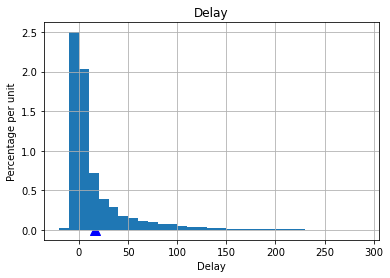

In [5]:
data=united [['Delay']]
axarr=data.hist(bins=np.arange(-20, 300, 10))
for ax in axarr.flatten():
        ax.set_xlabel('Delay')
        ax.set_ylabel("Percentage per unit")
        ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x/2000):.1f}'))
        ax.scatter(pop_mean, -0.02, marker='^', color='blue', s=100)
        #ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x/10):.1f}'))

Now let's take random samples and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

We will define a function simulate_sample_mean to do this, because we are going to vary the sample size later. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

In [14]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means =np.array([])

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample[label])
        means = np.append(means, new_sample_mean)

    sample_means = pd.DataFrame((   means),
                   columns=['Sample Means'])
    
    # Display empirical histogram and print all relevant quantities
    fig, ax = plt.subplots()
    ax.hist(sample_means['Sample Means'], bins=20,density=True, alpha=0.5)
    ax.set_xlabel('Sample Means')
    ax.set_ylabel('Percent per unit')
    ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x * 100):.0f}'))
    plt.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table[label]))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table[label]))
    print("SD of sample means:", np.std(means))

Let us simulate the mean of a random sample of 100 delays, then of 400 delays, and finally of 625 delays. We will perform 10,000 repetitions of each of these process. The xlim and ylim lines set the axes consistently in all the plots for ease of comparison. You can just ignore those two lines of code in each cell.

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.67042
Population SD: 39.48019985160957
SD of sample means: 3.931093123241931


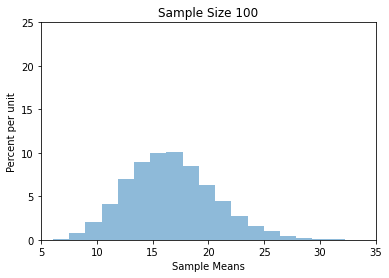

In [15]:
simulate_sample_mean(delay,'Delay', 100, 10000)
plt.xlim(5, 35)
plt.ylim(0, 0.25);


Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.65815575
Population SD: 39.48019985160957
SD of sample means: 1.9651899035123648


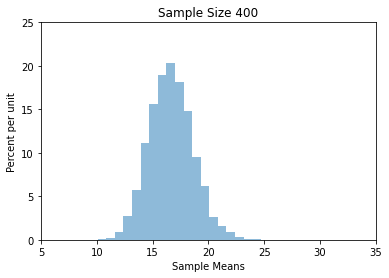

In [16]:
simulate_sample_mean(delay, 'Delay', 400, 10000)
plt.xlim(5, 35)
plt.ylim(0, 0.25);

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.64849392
Population SD: 39.48019985160957
SD of sample means: 1.5279846945447568


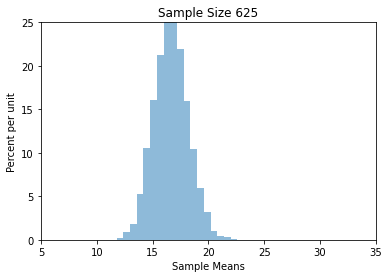

In [17]:
simulate_sample_mean(delay, 'Delay', 625, 10000)
plt.xlim(5, 35)
plt.ylim(0, 0.25);

You can see the Central Limit Theorem in action – the histograms of the sample means are roughly normal, even though the histogram of the delays themselves is far from normal.

You can also see that each of the three histograms of the sample means is centered very close to the population mean. In each case, the "average of sample means" is very close to 16.66 minutes, the population mean. Both values are provided in the printout above each histogram. As expected, the sample mean is an unbiased estimate of the population mean.



The SD of All the Sample Means 
You can also see that the histograms get narrower, and hence taller, as the sample size increases. We have seen that before, but now we will pay closer attention to the measure of spread.

The SD of the population of all delays is about 40 minutes.

In [10]:
pop_sd = np.std(delay.Delay)
pop_sd

39.48019985160957

Take a look at the SDs in the sample mean histograms above. In all three of them, the SD of the population of delays is about 40 minutes, because all the samples were taken from the same population.

Now look at the SD of all 10,000 sample means, when the sample size is 100. That SD is about one-tenth of the population SD. When the sample size is 400, the SD of all the sample means is about one-twentieth of the population SD. When the sample size is 625, the SD of the sample means is about one-twentyfifth of the population SD.

It seems like a good idea to compare the SD of the empirical distribution of the sample means to the quantity "population SD divided by the square root of the sample size."

Here are the numerical values. For each sample size in the first column, 10,000 random samples of that size were drawn, and the 10,000 sample means were calculated. The second column contains the SD of those 10,000 sample means. The third column contains the result of the calculation "population SD divided by the square root of the sample size."

The cell takes a while to run, as it's a large simulation. But you'll soon see that it's worth the wait.

In [11]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = np.array([])

for n in sample_sizes:
    means = np.array([])
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay['Delay'].sample(n)))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison=pd.DataFrame({'Sample Size n':sample_sizes,'SD of 10,000 Sample Means':sd_means,'pop_sd/sqrt(n)':pop_sd/np.sqrt(sample_sizes)})    
   

In [12]:
sd_comparison

,Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n)
0,25,7.877944,7.896040
1,50,5.547700,5.583343
2,75,4.472305,4.558781
3,100,3.912028,3.948020
4,125,3.544687,3.531216
5,150,3.185870,3.223545
6,175,2.992700,2.984423
7,200,2.787339,2.791672
8,225,2.609043,2.632013
9,250,2.469017,2.496947


The values in the second and third columns are very close. If we plot each of those columns with the sample size on the horizontal axis, the two graphs are essentially indistinguishable.

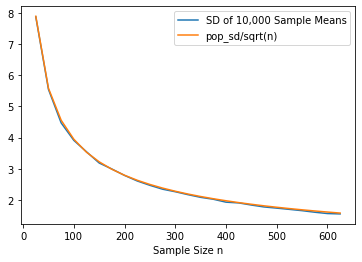

In [13]:
sd_comparison.plot('Sample Size n')

There really are two curves there. But they are so close to each other that it looks as though there is just one.

What we are seeing is an instance of a general result. Remember that the graph above is based on 10,000 replications for each sample size. But there are many more than 10,000 samples of each size. The probability distribution of the sample mean is based on the means of all possible samples of a fixed size.

Fix a sample size. If the samples are drawn at random with replacement from the population, then

SD of all possible sample means = Population SDsample size−−−−−−−−−√
 
This is the standard deviation of the averages of all the possible samples that could be drawn. It measures roughly how far off the sample means are from the population mean.

The Central Limit Theorem for the Sample Mean 
If you draw a large random sample with replacement from a population, then, regardless of the distribution of the population, the probability distribution of the sample mean is roughly normal, centered at the population mean, with an SD equal to the population SD divided by the square root of the sample size.

The Accuracy of the Sample Mean 
The SD of all possible sample means measures how variable the sample mean can be. As such, it is taken as a measure of the accuracy of the sample mean as an estimate of the population mean. The smaller the SD, the more accurate the estimate.

The formula shows that:

The population size doesn't affect the accuracy of the sample mean. The population size doesn't appear anywhere in the formula.
The population SD is a constant; it's the same for every sample drawn from the population. The sample size can be varied. Because the sample size appears in the denominator, the variability of the sample mean decreases as the sample size increases, and hence the accuracy increases.
The Square Root Law 
From the table of SD comparisons, you can see that the SD of the means of random samples of 25 flight delays is about 8 minutes. If you multiply the sample size by 4, you'll get samples of size 100. The SD of the means of all of those samples is about 4 minutes. That's smaller than 8 minutes, but it's not 4 times as small; it's only 2 times as small. That's because the sample size in the denominator has a square root over it. The sample size increased by a factor of 4, but the SD went down by a factor of  2=4–√ . In other words, the accuracy went up by a factor of  2=4–√ .

In general, when you multiply the sample size by a factor, the accuracy of the sample mean goes up by the square root of that factor.

So to increase accuracy by a factor of 10, you have to multiply sample size by a factor of 100. Accuracy doesn't come cheap!